# Regresión Lineal Simple

## Modelo Básico
Ecuación principal:  
$$ Y = \beta_0 + \beta_1 X + \epsilon $$  

- **Y**: Variable respuesta  
- **X**: Variable predictora  
- **β₀**: Intercepto  
- **β₁**: Pendiente  
- **ε**: Error aleatorio (residuos)  

## Supuestos Clave
1. **Linealidad**: Relación recta entre X e Y  
2. **Normalidad**: Residuos ~ N(0, σ²)  
3. **Homocedasticidad**: Varianza constante de residuos  
4. **Independencia**: Residuos no correlacionados  

## Estimación (MCO)
Fórmulas para calcular los coeficientes:  

$$ \hat{\beta}_1 = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sum (X_i - \bar{X})^2} $$  

$$ \hat{\beta}_0 = \bar{Y} - \hat{\beta}_1 \bar{X} $$  

## Bondad de Ajuste
**R²**: Proporción de varianza explicada  
$$ R^2 = 1 - \frac{SSR}{SST} $$  
- SSR: Suma de cuadrados de residuos  
- SST: Suma de cuadrados total  

Importamos Libreías :

In [62]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns   


Dataset:

In [63]:
df = pd.read_excel("Orange_Dataset.xlsx")
print(df.head(10))

   Tree  age  circumference  Column1
0     1    1            118       30
1     2    1            484       58
2     3    1            664       87
3     4    1           1004      115
4     5    1           1231      120
5     6    1           1372      142
6     7    1           1582      145
7     8    2            118       33
8     9    2            484       69
9    10    2            664      111


Estadística Descriptiva : 

In [64]:
df.describe()   

,Tree,age,circumference,Column1
count,35.000000,35.00000,35.000000,35.000000
mean,18.000000,3.00000,922.142857,115.857143
std,10.246951,1.43486,491.864528,57.488179
min,1.000000,1.00000,118.000000,30.000000
25%,9.500000,2.00000,484.000000,65.500000
50%,18.000000,3.00000,1004.000000,115.000000
75%,26.500000,4.00000,1372.000000,161.500000
max,35.000000,5.00000,1582.000000,214.000000


Correlación del DataFrame: 

In [65]:
df.corr()

,Tree,age,circumference,Column1
Tree,1.000000,9.801961e-01,1.965118e-01,0.245648
age,0.980196,1.000000e+00,-2.179385e-16,0.067746
circumference,0.196512,-2.179385e-16,1.000000e+00,0.913519
Column1,0.245648,6.774645e-02,9.135189e-01,1.000000


Visualización de las correlaciones en un mapa de calor

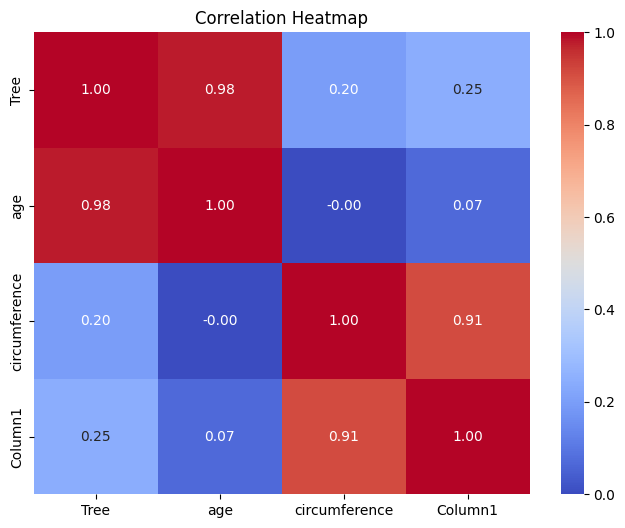

In [66]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Agrupamos los datos con lo cuales trabajaremos:

In [67]:
x_datos= df["circumference"].values
y_datos=df["Column1"].values

Gráfica de dispersión con línea de regresión:

<Figure size 1000x600 with 0 Axes>

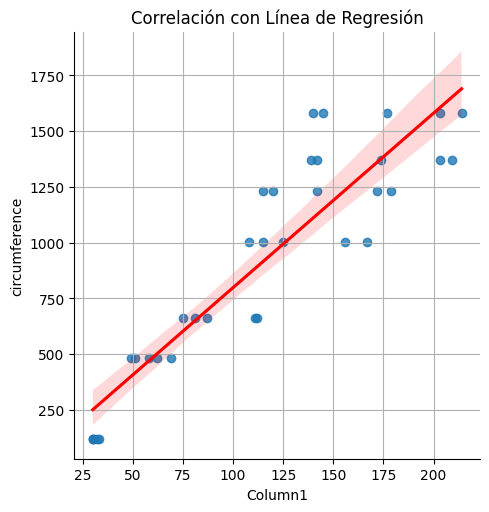

In [68]:
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='Column1', y='circumference', line_kws={'color': 'red'})
plt.title('Correlación con Línea de Regresión')
plt.grid(True)
plt.show()

Modelo de Regresión Lineal:

Intercepto (β0): 17.40
Coeficiente (β1): 0.11
MSE: 531.28
R²: 0.83


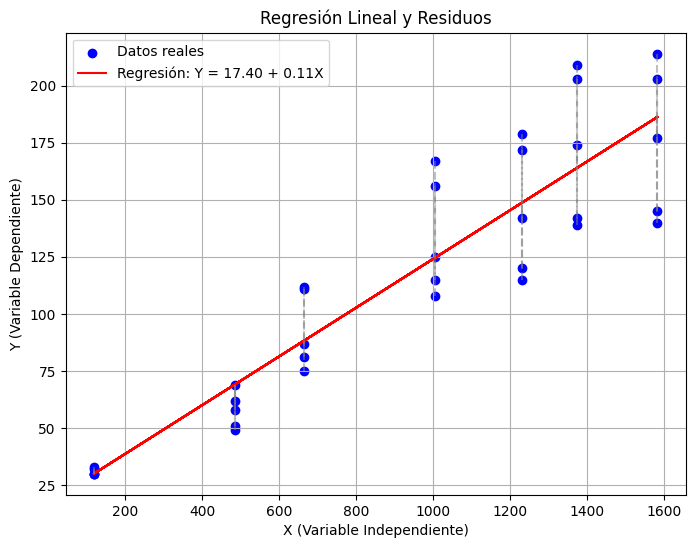

In [69]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Datos
X = np.array(x_datos).reshape(-1, 1)
Y = np.array(y_datos)

# Entrenar modelo
model = LinearRegression()
model.fit(X, Y)

# Predicciones y errores
Y_pred = model.predict(X)
residuos = Y - Y_pred  #  (residuos)

# Métricas
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)

# Coeficientes
print(f"Intercepto (β0): {model.intercept_:.2f}")
print(f"Coeficiente (β1): {model.coef_[0]:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Gráfica
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Datos reales')
plt.plot(X, Y_pred, color='red', label=f'Regresión: Y = {model.intercept_:.2f} + {model.coef_[0]:.2f}X')
plt.xlabel('X (Variable Independiente)')
plt.ylabel('Y (Variable Dependiente)')
plt.title('Regresión Lineal y Residuos')
plt.legend()

# Mostrar residuos como líneas verticales
for xi, yi, yp in zip(X, Y, Y_pred):
    plt.plot([xi, xi], [yi, yp], color='gray', linestyle='--', alpha=0.5)

plt.grid(True)
plt.show()



Residuos:

In [79]:
# Tabla de errores (residuos)
tabla_errores = pd.DataFrame({
    'X': X.flatten(),
    'Y Real': Y,
    'Y Predicho': Y_pred,
    'Error (Residuo)': residuos,
    'Error Cuadrático': residuos**2
})

print("\nTabla de Errores:")
print(tabla_errores)


Tabla de Errores:
       X  Y Real  Y Predicho  Error (Residuo)  Error Cuadrático
0    118      30   29.998549         0.001451          0.000002
1    484      58   69.076488       -11.076488        122.688577
2    664      87   88.295146        -1.295146          1.677403
3   1004     115  124.597057        -9.597057         92.103496
4   1231     120  148.833920       -28.833920        831.394966
5   1372     142  163.888536       -21.888536        479.108018
6   1582     145  186.310304       -41.310304       1706.541258
7    118      33   29.998549         3.001451          9.008711
8    484      69   69.076488        -0.076488          0.005850
9    664     111   88.295146        22.704854        515.510391
10  1004     156  124.597057        31.402943        986.144854
11  1231     172  148.833920        23.166080        536.667244
12  1372     203  163.888536        39.111464       1529.706598
13  1582     203  186.310304        16.689696        278.545936
14   118      30   29

<Figure size 1000x600 with 0 Axes>

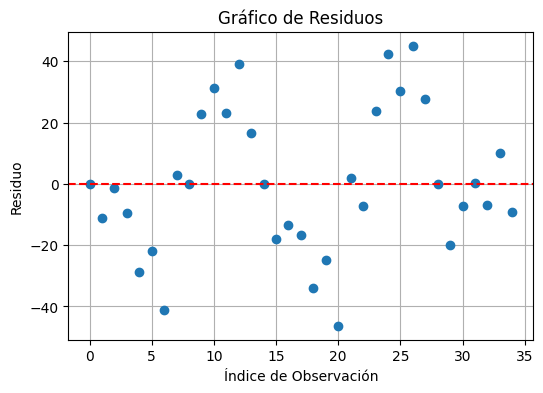

In [78]:
#grafico de los residuos
plt.figure(figsize=(10, 6))
plt.figure(figsize=(6, 4))
plt.plot(residuos, marker='o', linestyle='None')
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Residuos')
plt.xlabel('Índice de Observación')
plt.ylabel('Residuo')
plt.grid(True)
plt.show()


Resumen de la regresión:

In [ ]:

import statsmodels.api as sm
X_sm = sm.add_constant(X)  
modelo_sm = sm.OLS(Y, X_sm).fit()

# Summary 
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     166.4
Date:               jue, 26 Jun. 2025   Prob (F-statistic):           1.93e-14
Time:                        19:40:23   Log-Likelihood:                -159.48
No. Observations:                  35   AIC:                             323.0
Df Residuals:                      33   BIC:                             326.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.3997      8.623      2.018      0.0

Verificar los supuestos:

1.Normalidad (shapirto-test)

In [73]:
from scipy.stats import shapiro

shapiro_test = shapiro(residuos)
print(f"\nShapiro-Wilk Test: Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")


Shapiro-Wilk Test: Statistic=0.9729, p-value=0.5273


2.Igualdad de varianzas o homocedasticidad

In [74]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

X_with_const = sm.add_constant(x_datos)
bp_test = het_breuschpagan(residuos, X_with_const)
print(f"\nBreusch-Pagan Test: LM Statistic={bp_test[0]:.4f}, p-value={bp_test[1]:.4f}")


Breusch-Pagan Test: LM Statistic=11.2282, p-value=0.0008


3.Indepencia (Durbin-wantson)

In [75]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residuos)
print(f"- Durbin-Watson: {dw:.4f}")

print("\nInterpretación del estadístico Durbin-Watson:")
if dw < 1.5:
    print("-> Posible autocorrelación POSITIVA en los residuos (valor < 1.5)")
elif dw > 2.5:
    print("-> Posible autocorrelación NEGATIVA en los residuos (valor > 2.5)")
else:
    print("-> No hay evidencia de autocorrelación (valor cercano a 2)")

- Durbin-Watson: 0.6695

Interpretación del estadístico Durbin-Watson:
-> Posible autocorrelación POSITIVA en los residuos (valor < 1.5)


4.Coeficiente de correlacion  de Pearson

In [76]:
correlacion = df['circumference'].corr(df['Column1'])
print(f"Coeficiente de correlación: {correlacion:.4f}")

Coeficiente de correlación: 0.9135


5.Coeficiente de determinación

In [77]:
R2= correlacion**2
print(f"R²: {R2:.4f}")

R²: 0.8345
